## Signal treatment on Python

### Let's create an artificial signal composed of a cosinusoidal signal  with $F_1 = 10\,$Hz and a sinusoidal signal with $F_2 =60\,$Hz.

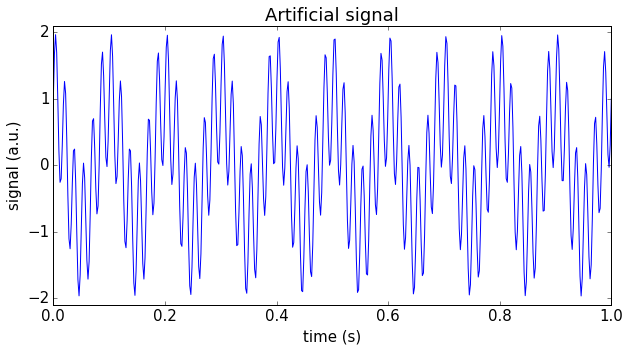

In [5]:
#boilerplate to have the right functions available
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import numpy as np #array functions
import scipy.fftpack 
import pylab
from matplotlib import mlab
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['font.size'] = 15

L = 1. #length signal
F = 5.e2 # Sample frequency 
N = int(L*F) # number of samples

f1 = 10.
f2 = 60.


t = np.linspace(0, L, L*F)

Sigcos = np.cos(2.*np.pi*f1*t)
Sigsin = np.sin(2.*np.pi*f2*t)

Sig = Sigsin + Sigcos;

plt.figure(figsize=(10,5))
plt.plot(t,Sig);
plt.title("Artificial signal")
plt.xlabel("time (s)")
plt.ylabel("signal (a.u.)");
plt.xlim(0,1.)
plt.ylim(-2.1,2.1);


## We calculate the Fourier transform of our signal.

I.E we convert the signal from the time domain to its representation in the frequency domain. We use a special fourier transform algorithm named Fast Fourier Transform, or short FFT.

https://docs.scipy.org/doc/numpy/reference/routines.fft.html#module-numpy.fft

#### Nyquist–Shannon sampling theorem:

To signal containing frequencies of $F_{max}\,$Hz must be sampled at least with with a frequency $F_s = 2 F_{max}$



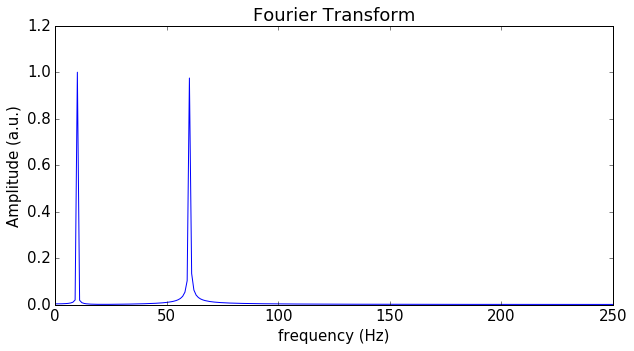

In [6]:
Sigf = np.fft.fft(Sig) # Fast Fourier Transform of the signal
#xf = np.linspace(0.0, F, N) # for showing
xf = np.linspace(0.0, F/2., N/2.) # frequency array as x axis (0 to F/2 with N/2 points due to symmetry 

plt.figure(figsize=(10,5))
#plt.plot(xf, (Sigf[:N])); # for showing importance of normalizing 
#plt.plot(xf, 2.0/N * np.abs(Sigf[:N])); # for showing Nyquist
plt.plot(xf, 2.0/N * np.abs(Sigf[:N//2]));
#plt.xlim(0,100);
#plt.ylim(0,1.1);
plt.title("Fourier Transform")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");

We find two peaks, namely at $F_1$ and $F_2$, please check.

### A noisy signal

Our signal can be obscured by adding some noise. Let's see what the FFT reveals of this noisy signal and calculate the FFT.

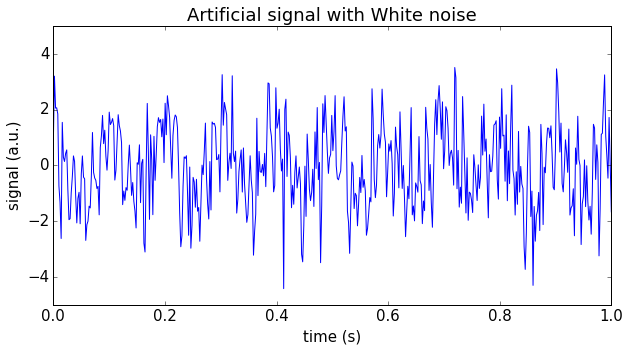

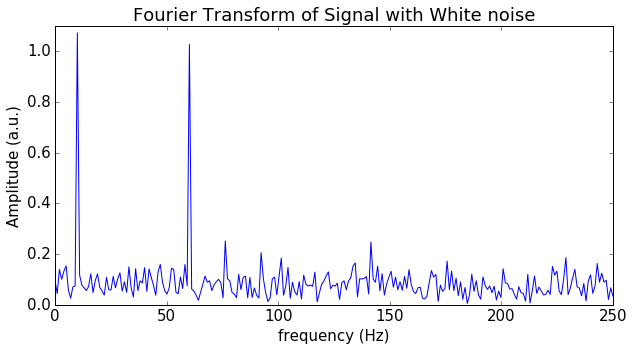

In [16]:
mean = 0 # White noise mean
std = 1 # White noise standard deviation
N_WN = N # number of points 
WN = np.random.normal(mean, std, size=N_WN)

Sig_WN = Sig + WN

plt.figure(figsize=(10,5))
plt.plot(t,Sig_WN);
plt.title("Artificial signal with white noise")
plt.xlabel("time (s)")
plt.ylabel("signal (a.u.)");
plt.xlim(0,1.);
plt.ylim(-5.,5.);

Sigf_WN = np.fft.fft(Sig_WN) # Fast Fourier Transform of the signal
xf = np.linspace(0.0, F/2., N/2.) # frequency array as x axis

plt.figure(figsize=(10,5))
plt.plot(xf, 2.0/N * np.abs(Sigf_WN[:N//2]));
#plt.xlim(0,100);
plt.ylim(0,1.1);
plt.title("Fourier Transform of Signal with White noise")
plt.xlabel("frequency (Hz)")
plt.ylabel("Amplitude (a.u.)");

### Some interesting functions 

In [8]:
print np.min(Sig_WN) # minimum value
print np.max(Sig_WN) # maximum value
print np.mean(Sig_WN) # mean value

-3.86233484786
3.19622654241
0.0369532250226


## Spectrogram 

http://matplotlib.org/api/mlab_api.html#matplotlib.mlab.specgram

Pxx, freqs, bins, im = plt.specgram(x, NFFT=None, Fs=None, window=None, noverlap=None)

Pxx = columns are the periodograms of successive segments

freqs = The frequencies corresponding to the rows in spectrum

bins = The times corresponding to midpoints of segments

NFFT = size of windows / number of data points used in each block for the FFT, A power 2 is most efficient

Fs = sample frequency 

window = Type of window use 

noverlap = The number of points of overlap between blocks, common value is NFFT/2


You have to try yourself to find which parameters suit the best your experiment. but remember; the larger the window size, the better frequency resolution, but the time localization is poor. Similarly, the smaller the window size, the better localization but the frequency resolution is poor. 
 

### "specgram" actually plots 10 * log10(Pxx)

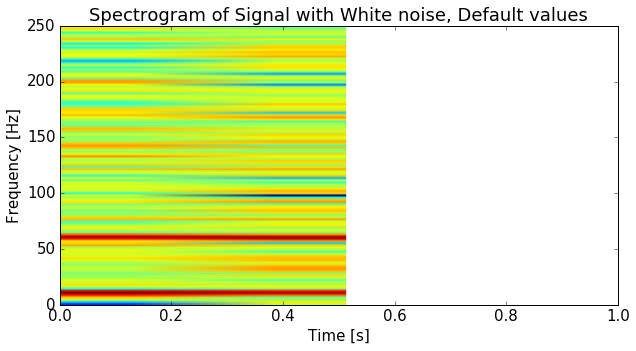

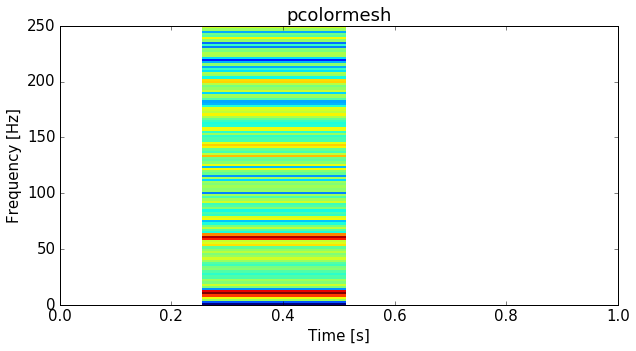

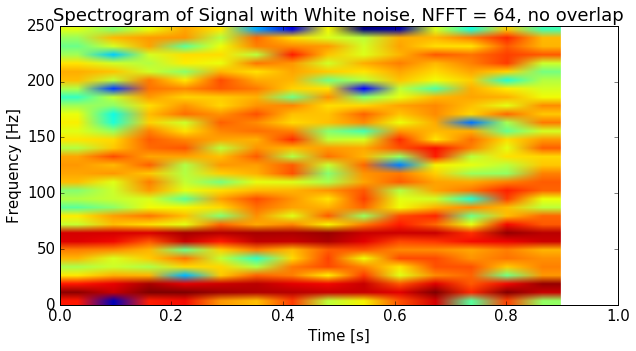

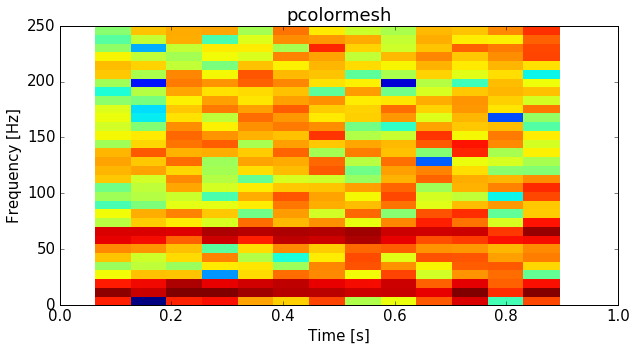

In [18]:
NFFT1 = 64

plt.figure(figsize=(10,5))
Pxx1, freqs1, bins1, im1 = plt.specgram(Sig_WN, Fs = F)
plt.title("Spectrogram of Signal with White noise, Default values")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');
plt.xlim(0,1);

plt.figure(figsize=(10,5))
plt.pcolormesh(bins1, freqs1, 10 * np.log10(Pxx1));
plt.title("pcolormesh")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');
plt.xlim(0,1);

plt.figure(figsize=(10,5))
Pxx2, freqs2, bins2, im2 = plt.specgram(Sig_WN, NFFT = NFFT1, Fs = F, noverlap=NFFT1/2.)
plt.title("Spectrogram of Signal with White noise, NFFT = 64, no overlap")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');
plt.xlim(0,1);

plt.figure(figsize=(10,5))
plt.pcolormesh(bins2, freqs2, 10 * np.log10(Pxx2));
plt.title("pcolormesh")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]');
plt.xlim(0,1);

### It shows a greater interest when frequencies are time-dependent 

Example found on: 
https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.signal.spectrogram.html

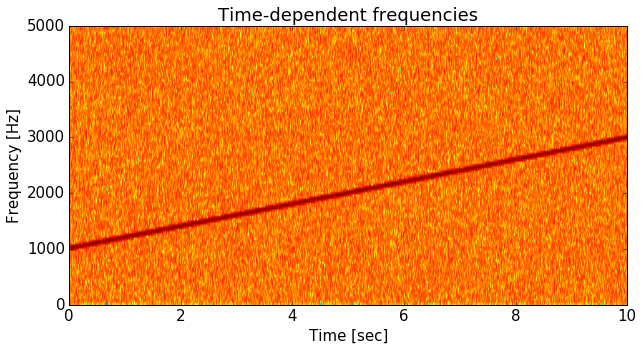

In [10]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
freq = np.linspace(1e3, 2e3, N)
x = amp * np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

plt.figure(figsize=(10,5))
Pxx0, freqs0, bins0, im0 = plt.specgram(x,  Fs = fs)
plt.title("Time-dependent frequencies")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

## Power Spectral Density 

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.psd

#### It describes how the power of a signal is distributed over the frequencies

Pxx, freqs = plt.psd(Sig_WN, NFFT=NFFT1, Fs=F, noverlap=NFFT1/2.)

Pxx = The values for the power spectrum $P_{xx}$ before scaling (real valued)

freqs = The frequencies corresponding to the elements in Pxx

NFFT = number of data points used in each block for the FFT, A power 2 is most efficient

Fs = sample frequency 

window = Type of window use 

noverlap = The number of points of overlap between blocks, common value is NFFT/2


You have to try yourself to find which parameters suit the best your experiment. but remember; the larger the window size, the better frequency resolution, but the time localization is poor. Similarly, the smaller the window size, the better localization but the frequency resolution is poor. 
 

### "Power Spectral Density" actually plots 10 * log10(Pxx)

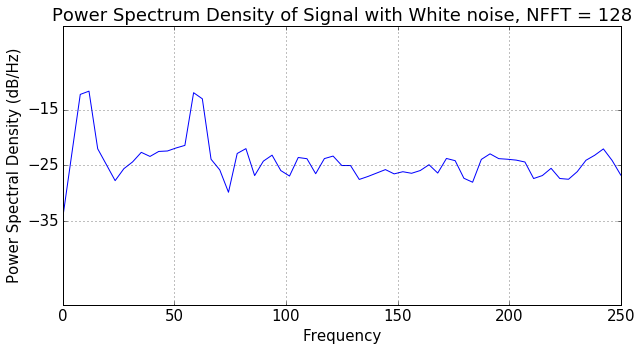

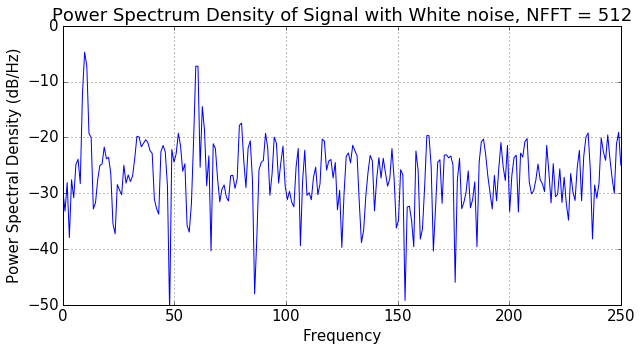

In [11]:
NFFT1 = 128
NFFT2 = 512

plt.figure(figsize=(10,5))
Pxx3, freqs3 = plt.psd(Sig_WN, NFFT=NFFT1, Fs=F, noverlap=NFFT1/2.)
plt.title("Power Spectrum Density of Signal with White noise, NFFT = 128")
#plt.xlim(0,500)
plt.ylim(-50,0)

plt.figure(figsize=(10,5))
Pxx4, freqs4 = plt.psd(Sig_WN, NFFT=NFFT2, Fs=F, noverlap=NFFT2/2.)
plt.title("Power Spectrum Density of Signal with White noise, NFFT = 512");
#plt.xlim(0,500);
plt.ylim(-50,0);

## Auto-correlation


Let create 2 sinusoidal signals of same frequency and add them some noise.

In a first time, we calculate the autocorrelation of signal 1, i.e the correlation between the signal and itself. The correlation measures the similarity between two signals as a function of the displacement of one relative to the other.

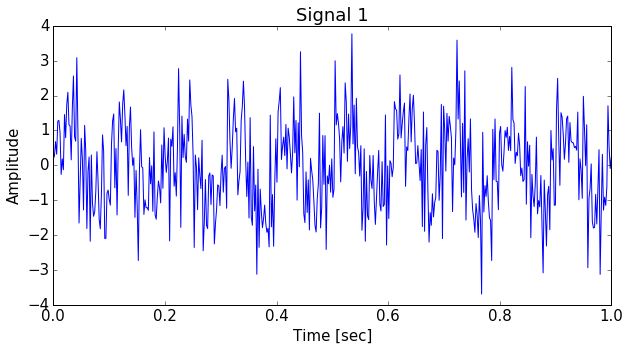

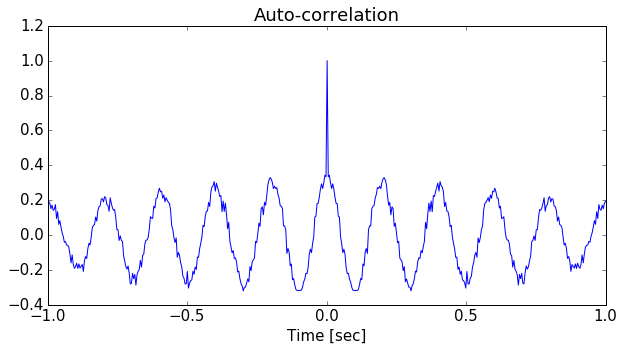

In [13]:
f = 10.
L = 1. #length signal
F = 5.e2 # Sample frequency 
N = int(L*F) # number of samples
mean = 0 # White noise mean
std = 1 # White noise standard deviation
N_WN = N # number of points 

WN1 = np.random.normal(mean, std, size=N_WN)
WN2 = np.random.normal(mean, std, size=N_WN)

t = np.linspace(0, L, L*F)

sin1 = np.sin(2.*np.pi*f*t)
sin2 = 2*np.sin(2.*np.pi*f*(t+0.33))

Sin_N1 = sin1 + WN1
Sin_N2 = sin2 + WN2

norm = np.sum(Sin_N1**2)
acor = np.correlate(Sin_N1, Sin_N1, "same")/norm

plt.figure(figsize=(10,5))
plt.plot(t,Sin_N1)
plt.title("Signal 1")
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]');


plt.figure(figsize=(10,5))
t2 = np.linspace(-L, L, L*F) # we generaly only look at the right side of the signal 
plt.plot (t2,acor)
plt.title("Auto-correlation")
plt.xlabel('Time [sec]');




## Cross-correlation


We now look at the correlation between signal 1 and signal 2, this is the cross-correlation

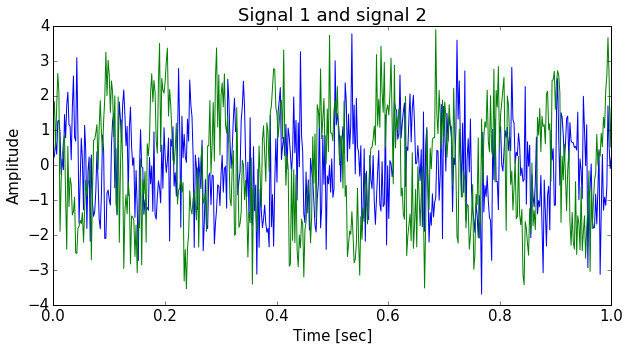

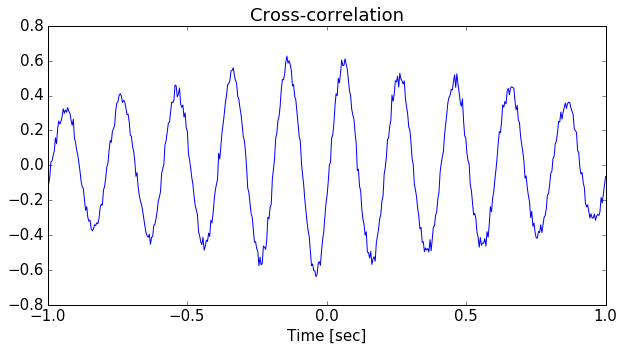

In [14]:
norm = np.sum(Sin_N1**2)
ccor = np.correlate(Sin_N1, Sin_N2, "same")/norm

plt.figure(figsize=(10,5))
plt.plot(t,Sin_N1,t,Sin_N2)
plt.title("Signal 1 and signal 2")
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]');


plt.figure(figsize=(10,5))
t2 = np.linspace(-L, L, L*F) # we generaly only look at the right side of the signal 
plt.plot (t2,ccor)
plt.title("Cross-correlation")
plt.xlabel('Time [sec]');

# Now it's your turn 

1- Load the files Signal1 and Signal 2 using the sample code bellow 

2- Plot both signal on a same figure

3- Calculate and plot for Signal1

        a. Fourier transform
        b. Spectrogram 
        c. Power spectral density 

4- Which Frequencies are present in the signal ?

5- Calculate and plot the auto-correlation for Signal1

6- Calculate and plot the cross-correlation for Signal1 and Signal2

7- According to the previous answer, can you guess how Signal1 was created ? 

In [15]:
# Sample code 

from numpy import genfromtxt

x1 = genfromtxt('Signal1.csv', delimiter=' ')
S1 = x1[0,:]
time = x1[1,:]